In [8]:
import numpy as np
from matplotlib import pyplot as plt  
from tensorflow import keras
from keras.utils.np_utils import to_categorical  
from keras.models import Sequential  
from keras.layers.core import Dense,Dropout,Flatten  
from keras.layers import Conv2D  
from keras.optimizers import Adam  
from keras.datasets import mnist  




In [10]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
img_rows,img_cols = X_train[0].shape[0],X_train[0].shape[1]
X_train = X_train.reshape(X_train.shape[0],img_rows,img_cols,1)
X_test = X_test.reshape(X_test.shape[0],img_rows,img_cols,1)
input_shape = (img_rows,img_cols,1)

X_train = X_train.astype('float32')/255.
X_test= X_test.astype('float32')/255.

n_classes =  len(set(y_train))
y_train = to_categorical(y_train,n_classes)
y_test = to_categorical(y_test,n_classes)

In [15]:
model = Sequential([
    
    Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    Conv2D(64,kernel_size=(3,3),activation='relu'),
    Conv2D(128,kernel_size=(3,3),activation='relu'),
    Dropout(0.5),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(n_classes,activation='softmax')
    

])
model.compile(loss='categorical_crossentropy',optimizer=Adam(),
                  metrics=['accuracy'])
callbacks = keras.callbacks.EarlyStopping(monitor='val_acc',patience=5)
model.fit(X_train,y_train,batch_size=128,epochs=11,verbose=1,validation_split=0.2,
          callbacks= callbacks )

Epoch 1/11
375/375 [==============================] - 380s 1s/step - loss: 0.2162 - accuracy: 0.9338 - val_loss: 0.0564 - val_accuracy: 0.9842
Epoch 2/11
375/375 [==============================] - 457s 1s/step - loss: 0.0794 - accuracy: 0.9760 - val_loss: 0.0406 - val_accuracy: 0.9883
Epoch 3/11
375/375 [==============================] - 418s 1s/step - loss: 0.0580 - accuracy: 0.9817 - val_loss: 0.0404 - val_accuracy: 0.9886
Epoch 4/11
375/375 [==============================] - 452s 1s/step - loss: 0.0455 - accuracy: 0.9868 - val_loss: 0.0407 - val_accuracy: 0.9903
Epoch 5/11
375/375 [==============================] - 514s 1s/step - loss: 0.0372 - accuracy: 0.9880 - val_loss: 0.0426 - val_accuracy: 0.9881
Epoch 6/11
375/375 [==============================] - 516s 1s/step - loss: 0.0320 - accuracy: 0.9900 - val_loss: 0.0356 - val_accuracy: 0.9905
Epoch 7/11
375/375 [==============================] - 475s 1s/step - loss: 0.0287 - accuracy: 0.9911 - val_loss: 0.0428 - val_accuracy: 0.9908

Test loss: 0.03471442312002182
Test accuracy: 0.9900000095367432
313/313 [==============================] - 31s 97ms/step


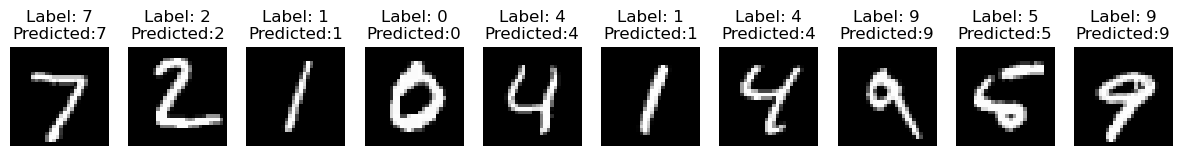

In [16]:
score = model.evaluate(X_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

preds = model.predict(X_test)

n_examples = 10
plt.figure(figsize=(15,15))
for i in range(n_examples):
    ax = plt.subplot(2,n_examples,i+1)
    plt.imshow(X_test[i,:,:,0],cmap='gray')
    plt.title("Label: {}\nPredicted:{}".format(np.argmax(y_test[i]),np.argmax(preds[i])))
    plt.axis('off')
plt.show()